In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.compose import make_column_transformer

In [95]:
# Load your dataset (replace 'your_dataset.csv' with your actual file)
df1 = pd.read_csv("D:\ML\Bhomick\Combiend_volume\merged_file_left635645.csv")
df1

,nodenumber,inlet_velocity,side_injection,x-coordinate,y-coordinate,z-coordinate,mean-pressure,air-mean-y-velocity,air-mean-vof,solid-mean-y-velocity,solid-mean-vof
0,1089,1.0,0.1875,0.124,0.635,-0.002700,6510.0,-1.33,0.720,-0.565,0.280
1,1090,1.0,0.1875,0.124,0.635,-0.002830,6510.0,4.08,0.699,-0.349,0.301
2,1092,1.0,0.1875,0.124,0.635,-0.003100,6500.0,3.88,0.681,-0.340,0.319
3,1093,1.0,0.1875,0.123,0.635,-0.002870,6540.0,-6.71,0.721,-0.780,0.279
4,1095,1.0,0.1875,0.124,0.635,-0.003150,6530.0,-1.67,0.695,-0.605,0.305
...,...,...,...,...,...,...,...,...,...,...,...
1692235,221783,2.0,0.3750,0.121,0.645,0.000698,6550.0,-8.72,0.573,-0.944,0.427
1692236,221784,2.0,0.3750,0.121,0.645,0.000725,6430.0,-10.50,0.586,-1.090,0.414
1692237,221785,2.0,0.3750,0.121,0.645,0.000830,6550.0,-9.72,0.581,-1.140,0.419
1692238,221786,2.0,0.3750,0.120,0.645,0.000758,6460.0,-11.20,0.592,-1.170,0.408


In [96]:
df1.describe()

,nodenumber,inlet_velocity,side_injection,x-coordinate,y-coordinate,z-coordinate,mean-pressure,air-mean-y-velocity,air-mean-vof,solid-mean-y-velocity,solid-mean-vof
count,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06,1.692240e+06
mean,9.092037e+04,1.500000e+00,3.625000e-01,2.581634e-02,1.171731e+00,-7.896836e-05,4.787370e+03,3.206100e-01,7.361796e-01,2.105127e-03,2.638205e-01
std,5.728115e+04,4.082484e-01,1.075291e-01,1.074705e-01,7.618272e-01,9.715902e-02,5.229256e+03,2.178230e+00,2.409688e-01,2.731266e-01,2.409686e-01
min,7.240000e+02,1.000000e+00,1.875000e-01,-2.500000e-01,0.000000e+00,-2.500000e-01,-1.260000e+04,-1.240000e+02,3.730000e-01,-8.410000e+00,4.410000e-18
25%,4.410300e+04,1.000000e+00,3.125000e-01,-5.860000e-02,6.300000e-01,-6.062500e-02,-2.920000e-03,2.190000e-02,5.180000e-01,-5.490000e-04,7.510000e-11
50%,7.230700e+04,1.500000e+00,3.750000e-01,4.890000e-02,9.920000e-01,1.615000e-05,3.340000e+03,2.040000e-01,6.130000e-01,0.000000e+00,3.870000e-01
75%,1.166380e+05,2.000000e+00,4.375000e-01,1.160000e-01,1.920000e+00,6.020000e-02,8.020000e+03,4.840000e-01,1.000000e+00,1.910000e-02,4.820000e-01
max,2.226720e+05,2.000000e+00,5.000000e-01,2.500000e-01,2.350000e+00,2.500000e-01,6.240000e+04,1.750000e+02,1.000000e+00,6.730000e+00,6.270000e-01


In [97]:
df1.columns

Index(['nodenumber', 'inlet_velocity', 'side_injection', '    x-coordinate',
       '    y-coordinate', '    z-coordinate', '   mean-pressure',
       'air-mean-y-velocity', '    air-mean-vof', 'solid-mean-y-velocity',
       '  solid-mean-vof'],
      dtype='object')

In [98]:
df1.shape

(1692240, 11)

In [99]:
# Filter the dataset to include rows where 'y-coordinate' is greater than 0.630 and less than 0.650
#df2 = df1[(df1['    y-coordinate'] > 0.635) & (df1['    y-coordinate'] < 0.645)]

In [100]:
# Delete rows where 'y-coordinate' is exactly 0.640
#df2= df1[df1['    y-coordinate'] != 0.640]

In [101]:
# Save the merged DataFrame to a new Excel file
#output_file = 'D:\\ML\\Bhomick\\combined_plan\\merged_file_635645.csv'
#df2.to_csv(output_file, index=False)

#print(f"Merged file saved as {output_file}")


In [102]:
dataset=df1

In [103]:
dataset.shape

(1692240, 11)

In [104]:
dataset.min()

nodenumber               7.240000e+02
inlet_velocity           1.000000e+00
side_injection           1.875000e-01
    x-coordinate        -2.500000e-01
    y-coordinate         0.000000e+00
    z-coordinate        -2.500000e-01
   mean-pressure        -1.260000e+04
air-mean-y-velocity     -1.240000e+02
    air-mean-vof         3.730000e-01
solid-mean-y-velocity   -8.410000e+00
  solid-mean-vof         4.410000e-18
dtype: float64

In [105]:
dataset.max()

nodenumber               222672.000
inlet_velocity                2.000
side_injection                0.500
    x-coordinate              0.250
    y-coordinate              2.350
    z-coordinate              0.250
   mean-pressure          62400.000
air-mean-y-velocity         175.000
    air-mean-vof              1.000
solid-mean-y-velocity         6.730
  solid-mean-vof              0.627
dtype: float64

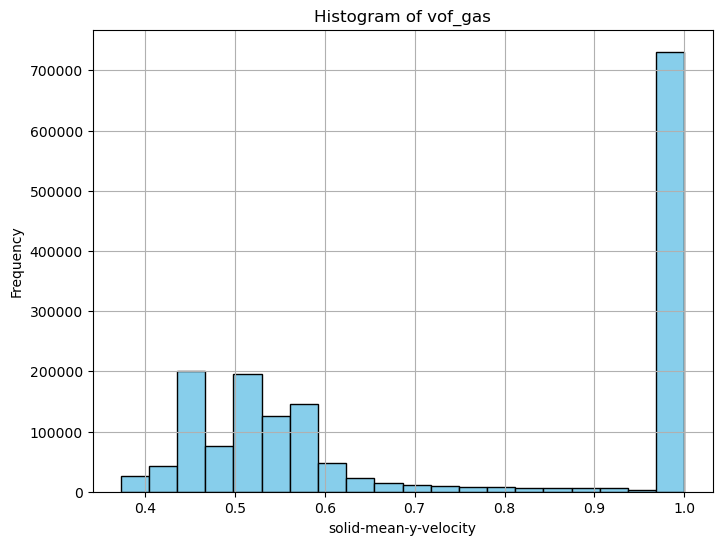

In [219]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the column 'air-mean-vof'
solid_mean_y_velocity = dataset['solid-mean-y-velocity']

# Create a histogram plot
plt.figure(figsize=(8, 6))
plt.hist(air_mean_vof, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of vof_gas')
plt.xlabel('solid-mean-y-velocity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [107]:
dataset.columns

Index(['nodenumber', 'inlet_velocity', 'side_injection', '    x-coordinate',
       '    y-coordinate', '    z-coordinate', '   mean-pressure',
       'air-mean-y-velocity', '    air-mean-vof', 'solid-mean-y-velocity',
       '  solid-mean-vof'],
      dtype='object')

In [108]:
# Count zero values in each column
zero_count_per_column = (dataset == 0).sum()
print("Zero count per column:")
print(zero_count_per_column)

Zero count per column:
nodenumber                    0
inlet_velocity                0
side_injection                0
    x-coordinate              0
    y-coordinate           1500
    z-coordinate              0
   mean-pressure              0
air-mean-y-velocity           0
    air-mean-vof              0
solid-mean-y-velocity    715794
  solid-mean-vof              0
dtype: int64


In [221]:
# Assume the dataset has columns: ['x', 'y', 'z', 'gas_volume_fraction', 'solid_volume_fraction']
# For 3D coordinates (x, y, z) and target values (gas and solid volume fraction)

# Separate features and target values
X = df1[['inlet_velocity', 'side_injection', '    x-coordinate',
       '    y-coordinate', '    z-coordinate']]  # Features: 3D coordinates
y =df1[['solid-mean-y-velocity']]  # Target: gas & solid volume fraction

In [256]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [257]:
X_test.shape

(253836, 5)

In [258]:
y_train

,solid-mean-y-velocity
1479309,0.00417
625020,0.04350
1541997,0.00000
1507787,0.00000
485161,0.00000
...,...
259178,0.00000
1414414,-0.01610
131932,0.00000
671155,0.08190


In [259]:
# Standardize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [260]:
y_test_scaled

array([[0.55548217],
       [0.56215324],
       [0.55548217],
       ...,
       [0.55672391],
       [0.55548217],
       [0.55025099]])

In [261]:
y_test

,solid-mean-y-velocity
809831,0.0000
366407,0.1010
978197,0.0000
670748,-0.1460
1367666,0.0242
...,...
789588,-2.6900
404268,0.1810
849832,0.0188
1388603,0.0000


In [262]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)  ]) # Output layer, no activation function for regression

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               1536      
                                                                 
 dense_45 (Dense)            (None, 128)               32896     
                                                                 
 dense_46 (Dense)            (None, 128)               16512     
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 32)               

In [263]:
# Create the model
#model = tf.keras.models.Sequential([
   # tf.keras.layers.Dense(512, activation='swish', input_shape=(5,)),
   # tf.keras.layers.Dropout(0.3),  # Dropout layer with 30% dropout rate
   # tf.keras.layers.Dense(256, activation='swish'),
   # tf.keras.layers.Dropout(0.3),
   # tf.keras.layers.Dense(128, activation='swish'),
   # tf.keras.layers.Dropout(0.3),
   # tf.keras.layers.Dense(64, activation='swish'),
   # tf.keras.layers.Dense(32, activation='swish'),
   # tf.keras.layers.Dense(16, activation='swish'),
   # tf.keras.layers.Dense(8, activation='swish'),  # Additional hidden layer
   # tf.keras.layers.Dense(4, activation='swish'), 
   # tf.keras.layers.Dense(2, activation='swish'), 
   # tf.keras.layers.Dense(1)  # Output layer for regression (no activation function)
#])

In [264]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')


In [265]:
# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [266]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/10
71921/71921 [==============================] - 310s 4ms/step - loss: 2.9842e-04 - val_loss: 2.0423e-04
Epoch 2/10
71921/71921 [==============================] - 322s 4ms/step - loss: 2.0384e-04 - val_loss: 1.8560e-04
Epoch 3/10
71921/71921 [==============================] - 290s 4ms/step - loss: 1.9877e-04 - val_loss: 1.8458e-04
Epoch 4/10
71921/71921 [==============================] - 293s 4ms/step - loss: 1.9653e-04 - val_loss: 2.0828e-04
Epoch 5/10
71921/71921 [==============================] - 256s 4ms/step - loss: 1.9427e-04 - val_loss: 2.5348e-04
Epoch 6/10
71921/71921 [==============================] - 259s 4ms/step - loss: 1.9462e-04 - val_loss: 1.9205e-04
Epoch 7/10
71921/71921 [==============================] - 259s 4ms/step - loss: 1.9498e-04 - val_loss: 2.0502e-04
Epoch 8/10
71921/71921 [==============================] - 260s 4ms/step - loss: 1.9126e-04 - val_loss: 1.8671e-04
Epoch 9/10
71921/71921 [==============================] - 259s 4ms/step - loss: 1.8889e-

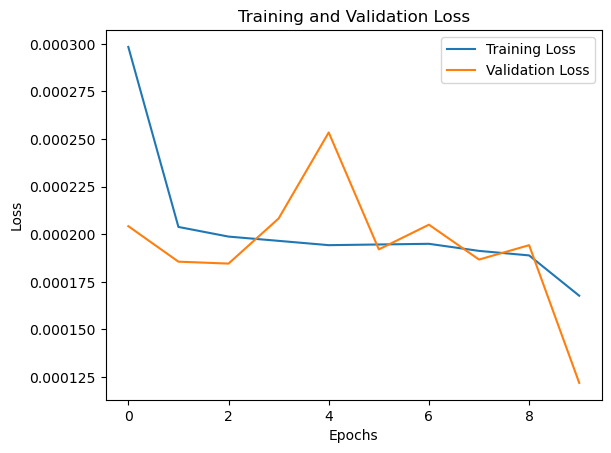

In [267]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [268]:
# Predicting on test data
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

7933/7933 [==============================] - 20s 2ms/step


In [269]:
mse = mean_squared_error(y_test_inv, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.03026218494713063


In [270]:
# Predict the target values for both training and testing data
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled= model.predict(X_test_scaled)

7933/7933 [==============================] - 20s 3ms/step


In [271]:
y_train_pred  = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred  = scaler_y.inverse_transform(y_test_pred_scaled)

In [272]:
# Calculate Mean Squared Error for both training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(mse_train)
print(mse_test)

0.028634089340330467
0.03026218494713063


In [273]:
# Calculate RMSE for both training and testing data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [274]:
# Calculate R2 score for both training and testing data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [275]:
print("Root Mean Squared Error for training data:", rmse_train)
print("Root Mean Squared Error for testing data:", rmse_test)
print("R-squared for training data:", r2_train)
print("R-squared for testing data:", r2_test)

Root Mean Squared Error for training data: 0.16921610248534408
Root Mean Squared Error for testing data: 0.1739602970425454
R-squared for training data: 0.6148717082560358
R-squared for testing data: 0.6018458387233869


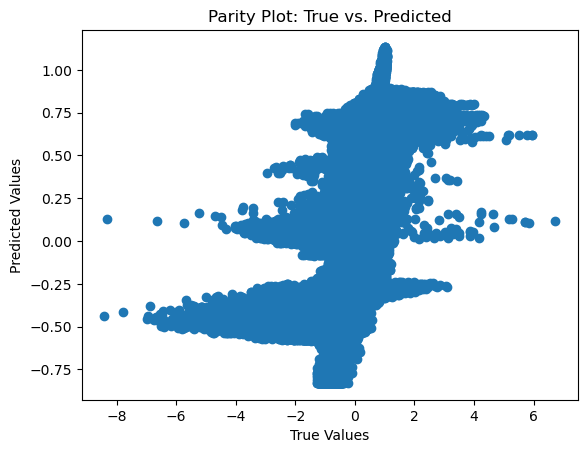

In [276]:
plt.scatter(y_train, y_train_pred)
plt.title('Parity Plot: True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [277]:
y_test_pred.shape

(253836, 1)

In [182]:
import pandas as pd

# Ensure y_train and y_train_pred are 1-dimensional arrays
y_train = np.ravel(y_train)  # Flatten if necessary
y_train_pred = np.ravel(y_train_pred)  # Flatten if necessary

# Create a DataFrame with true and predicted values
parity_data = pd.DataFrame({
    'True Values': y_train,
    'Predicted Values': y_train_pred
})

# Define the output path for the CSV file
output_csv_path = 'D:\\ML\\Bhomick\\results\\parity_train_GVF.csv'

# Save the DataFrame to a CSV file
parity_data.to_csv(output_csv_path, index=False)

# Print confirmation message
print(f"Predicted plot data saved to {output_csv_path}")


Predicted plot data saved to D:\ML\Bhomick\results\parity_train_GVF.csv


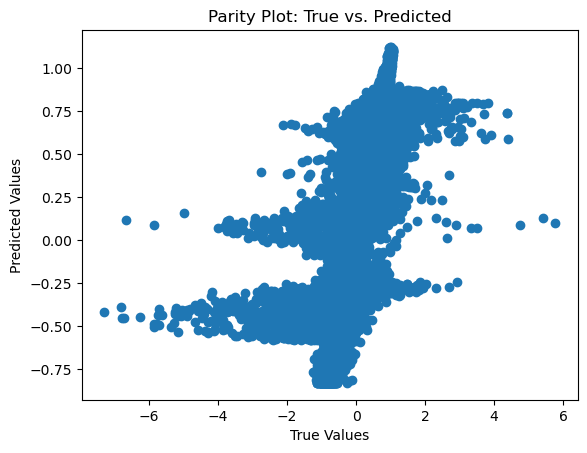

In [278]:
plt.scatter(y_test, y_test_pred)
plt.title('Parity Plot: True vs. Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [184]:
import pandas as pd

# Ensure y_test and y_test_pred are 1-dimensional arrays
y_test = np.ravel(y_test)  # Flatten if necessary
y_test_pred = np.ravel(y_test_pred)  # Flatten if necessary

# Create a DataFrame with true and predicted values
parity_data = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_test_pred
})

# Define the output path for the CSV file
output_csv_path = 'D:\\ML\\Bhomick\\results\\parity_test_GVF.csv'

# Save the DataFrame to a CSV file
parity_data.to_csv(output_csv_path, index=False)

# Print confirmation message
print(f"Predicted plot data saved to {output_csv_path}")


Predicted plot data saved to D:\ML\Bhomick\results\parity_test_GVF.csv


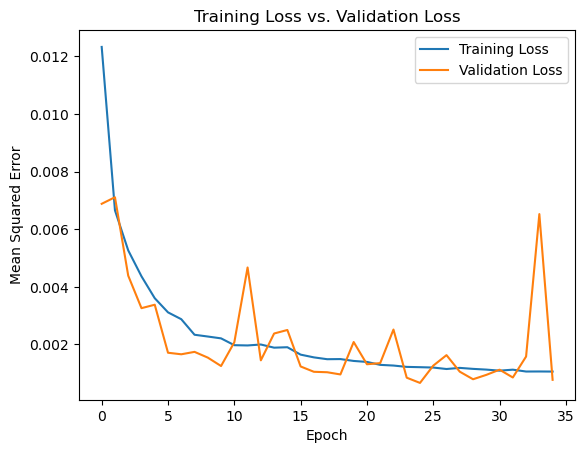

In [189]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


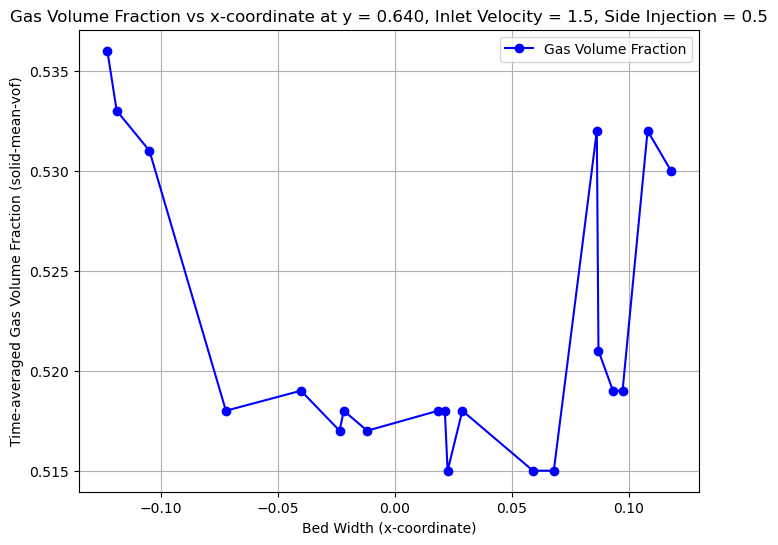

In [210]:
# Filter the dataset for the specific conditions: inlet velocity = 1.5, side injection = 0.5, and y-coordinate = 0.640
filtered_df = dataset[(dataset['inlet_velocity'] == 1.5) & 
                      (dataset['side_injection'] == 0.3125) & 
                      (dataset['    y-coordinate'] == 0.400)]  # Adjust y-coordinate column name if needed

# Select the required columns: 'x-coordinate' and 'solid-mean-vof'
x = filtered_df['    x-coordinate']  # Adjust x-coordinate column name if needed
y = filtered_df['    air-mean-vof']  # Replace with the actual column name for solid volume fraction

# Sort the filtered data by 'x-coordinate'
filtered_df = filtered_df.sort_values(by='    x-coordinate')

# Select the required columns: 'x-coordinate' and 'solid-mean-vof'
x = filtered_df['    x-coordinate']
y = filtered_df['    air-mean-vof']  # Adjust column name if needed

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Gas Volume Fraction', color='blue', marker='o')

# Add labels and title
plt.xlabel('Bed Width (x-coordinate)')
plt.ylabel('Time-averaged Gas Volume Fraction (solid-mean-vof)')
plt.title('Gas Volume Fraction vs x-coordinate at y = 0.640, Inlet Velocity = 1.5, Side Injection = 0.5')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()

In [43]:
# Save the filtered data for the plot into a CSV file
plot_data = pd.DataFrame({'x-coordinate': x, 'solid-mean-vof': y})
output_csv_path = 'D:\\ML\\Bhomick\\results\\plot_data_y1=790.csv'
plot_data.to_csv(output_csv_path, index=False)

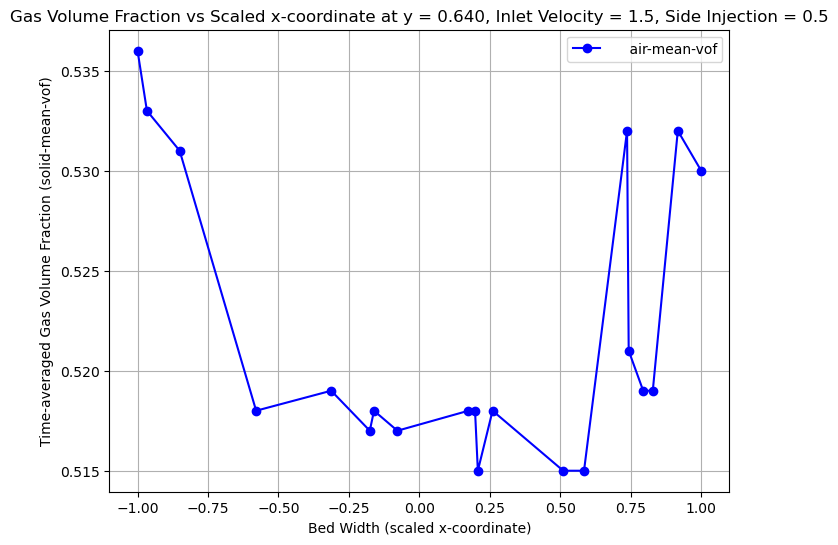

In [211]:
# scale data plot x(-1 to 1)

# Filter the dataset for the specific conditions: inlet velocity = 1.5, side injection = 0.5, and y-coordinate = 0.640
filtered_df = dataset[(dataset['inlet_velocity'] == 1.5) & 
                      (dataset['side_injection'] == 0.3125) & 
                      (dataset['    y-coordinate'] == 0.400)]  # Adjust y-coordinate column name if needed

# Sort the filtered data by 'x-coordinate'
filtered_df = filtered_df.sort_values(by='    x-coordinate')

# Select the required columns: 'x-coordinate' and 'solid-mean-vof'
x = filtered_df['    x-coordinate'].values.reshape(-1, 1)  # Reshape for scaler
y = filtered_df['    air-mean-vof']  # Adjust column name if needed

# Scale x-coordinates from -0.125 to 0.125 to -1 to 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_scaled = scaler.fit_transform(x)


# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(x_scaled, y, label='    air-mean-vof', color='blue', marker='o')

# Add labels and title
plt.xlabel('Bed Width (scaled x-coordinate)')
plt.ylabel('Time-averaged Gas Volume Fraction (solid-mean-vof)')
plt.title('Gas Volume Fraction vs Scaled x-coordinate at y = 0.640, Inlet Velocity = 1.5, Side Injection = 0.5')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


In [212]:
import pandas as pd
import numpy as np

# Ensure x_scaled and y are 1-dimensional arrays
x_scaled = np.ravel(x_scaled)  # Flatten if necessary
y = np.ravel(y)  # Flatten if necessary

# Create a DataFrame with 'x-coordinate' and 'solid-mean-vof' values
plot_data = pd.DataFrame({
    'x-coordinate': x_scaled,
    'Gas-mean-vof': y
})

# Define the output path for the CSV file
output_csv_path = 'D:\\ML\\Bhomick\\results\\GVF\\plot_data_y1=400.csv'

# Save the DataFrame to a CSV file
plot_data.to_csv(output_csv_path, index=False)

# Print confirmation message
print(f"Plot data saved to {output_csv_path}")


Plot data saved to D:\ML\Bhomick\results\GVF\plot_data_y1=400.csv


1/1 [==============================] - 0s 29ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


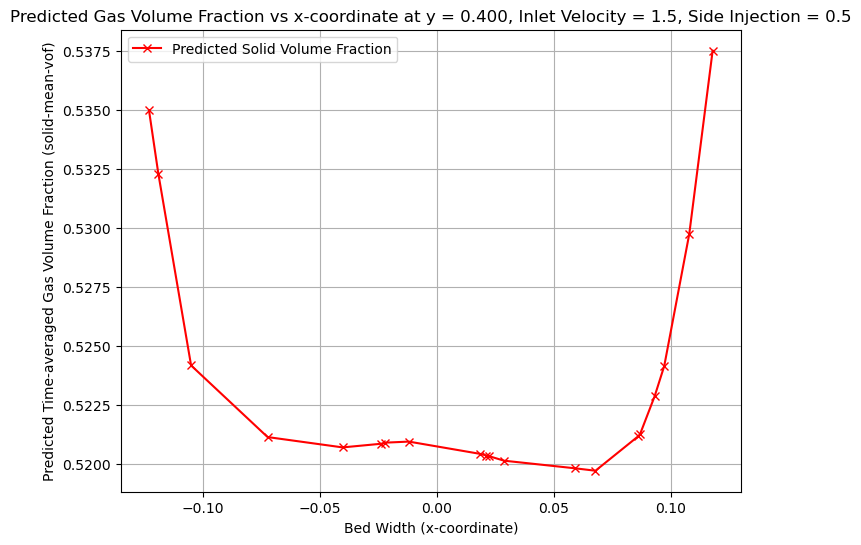

In [214]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Initialize the output scaler for inverse transforming predictions if not already defined
output_scaler = MinMaxScaler()

# Fit the output scaler on the 'solid-mean-vof' column
output_scaler.fit(dataset['    air-mean-vof'].values.reshape(-1, 1))

# Filter dataset for specific conditions
filtered_df = dataset[(dataset['inlet_velocity'] == 1.5) & 
                 (dataset['side_injection'] == 0.3125) & 
                 (dataset['    y-coordinate'] == 0.400)]  # Adjust column names if needed

# Sort the filtered data by 'x-coordinate'
filtered_df = filtered_df.sort_values(by='    x-coordinate')

# Select 'x-coordinate' values
x = filtered_df['    x-coordinate']

# Prepare to predict 'solid-mean-vof' based on the model
predicted_vof = []

for i in x:
    # Prepare the input data for the prediction
    input_data = np.array([[1.5, 0.400, i, 0.3125, 0]])  # Adjust as per model input structure
    
    # Scale the input data using the scaler_X
    scaled_input = scaler_X.transform(input_data)
    
    # Predict using the model
    predicted = model.predict(scaled_input)
    
    # Inverse transform the prediction to original scale
    predicted_vof.append(output_scaler.inverse_transform(predicted.reshape(-1, 1))[0][0])

# Plot the predicted solid-mean-vof
plt.figure(figsize=(8, 6))
plt.plot(x, predicted_vof, label='Predicted Solid Volume Fraction', color='red', marker='x')

# Add labels and title
plt.xlabel('Bed Width (x-coordinate)')
plt.ylabel('Predicted Time-averaged Gas Volume Fraction (solid-mean-vof)')
plt.title('Predicted Gas Volume Fraction vs x-coordinate at y = 0.400, Inlet Velocity = 1.5, Side Injection = 0.5')

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


In [216]:
import pandas as pd
import numpy as np

# Ensure x_scaled and y are 1-dimensional arrays
x_scaled = np.ravel(x_scaled)  # Flatten if necessary
y = np.ravel(y)  # Flatten if necessary

# Create a DataFrame with 'x-coordinate' and 'solid-mean-vof' values
plot_data = pd.DataFrame({
    'x-coordinate': x_scaled,
    'Gas-mean-vof':predicted_vof
})

# Define the output path for the CSV file
output_csv_path = 'D:\\ML\\Bhomick\\results\\GVF\\predicted_y1=400.csv'

# Save the DataFrame to a CSV file
plot_data.to_csv(output_csv_path, index=False)

# Print confirmation message
print(f"Plot data saved to {output_csv_path}")


Plot data saved to D:\ML\Bhomick\results\GVF\predicted_y1=400.csv


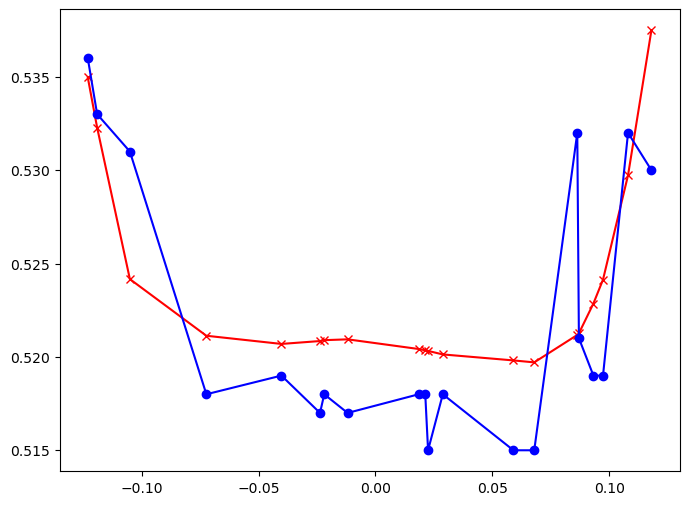

In [215]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(x, predicted_vof, label='Predicted Solid Volume Fraction', color='red', marker='x')
plt.plot(x, y, label='Solid Volume Fraction', color='blue', marker='o')